https://ocefpaf.github.io/python4oceanographers/blog/2014/12/01/PCA/

In [1]:
import pandas as pd


df = pd.read_csv("RGB_values.csv")
df = df.rename(columns={"Unnamed: 0": "names"})
df

,names,R,G,B
0,cl1_p12_moca2_deixa4_a0004,176,121,3
1,cl1_p3_brava_deixa2_g0004,178,171,121
2,cl1_p4_brava_deixa3_a0007,133,123,75
3,cl1_p5_moca2_deixa2_c0002,184,210,254
4,cl1_p12_lagoinha_deixa1_g0005,208,227,254
...,...,...,...,...
211,cl1_p12_moca2_deixa4_c0001,137,131,113
212,cl1_p3_brava_deixa0_f0004,205,198,152
213,cl1_p2_joaq_dunai_d0012,254,253,124
214,cl1_p4_brava_deixa4_d0003,174,158,27


In [2]:
def z_score(x):
    """Remove a média e normaliza os pelo desvio padrão"""
    return (x - x.mean()) / x.std()

RGB = df[["R", "G", "B"]]
zs = RGB.apply(z_score).T
zs

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
R,0.076220,0.139664,-1.287816,0.329995,1.091318,0.361717,-0.367885,-0.907155,0.552047,-3.095958,...,0.171386,1.059596,-1.065764,-0.336163,-1.890530,-1.160929,0.996152,2.550520,0.012777,-0.431328
G,-1.574661,0.009387,-1.511299,1.244944,1.783521,-0.085656,-0.339104,-0.877680,0.579644,-2.461728,...,0.421239,0.928135,-1.067766,-0.339104,-1.638023,-1.257851,0.864773,2.607226,-0.402466,0.199473
B,-1.840428,-0.115775,-0.788098,1.828113,1.828113,-0.130391,0.293464,0.118076,0.337312,-0.145007,...,0.848861,0.878093,0.001150,0.118076,-0.335011,-0.232701,0.337312,-0.071928,-1.489652,1.111944


In [3]:
from sklearn.decomposition import PCA


pca = PCA(n_components=None)
pca.fit(zs);

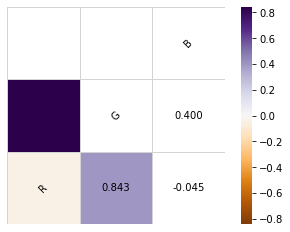

In [8]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt


corr = RGB.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
seaborn.heatmap(
    corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
    square=True, linecolor="lightgray", linewidths=1, ax=ax)

for k in range(len(corr)):
    ax.text(k+0.5,len(corr)-(k+0.5), corr.columns[k], 
            ha="center", va="center", rotation=45)
    for j in range(k+1, len(corr)):
        s = "{:.3f}".format(corr.values[k, j])
        ax.text(
            j+0.5,len(corr)-(k+0.5), s,
            ha="center", va="center")
ax.axis("off");

In [9]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ["PC %s" % pc for pc in loadings.index + 1]
loadings.columns = ["TS %s" % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3
PC 1,-0.075175,-0.206043,0.787712
PC 2,-0.011244,-0.011195,0.132457
PC 3,0.028524,-0.064794,-0.058175
PC 4,0.063883,0.093006,-0.002672
PC 5,0.028113,0.089641,-0.054457
...,...,...,...
PC 212,0.048640,-0.062685,-0.011297
PC 213,-0.031792,0.008213,-0.042742
PC 214,-0.134457,0.137748,-0.018062
PC 215,-0.070922,-0.002229,-0.022812


In [10]:
PCs = np.dot(loadings.values.T, RGB)

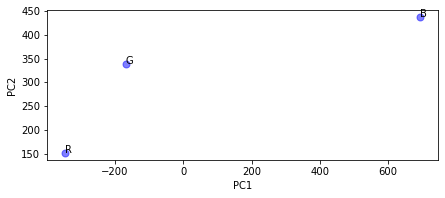

In [13]:
line = {"linewidth": 1, "linestyle": "--", "color": "k"}
marker = {"linestyle": "none", "marker": "o", "markersize": 7, "color": "blue", "alpha": 0.5}


fig, ax = plt.subplots(figsize=(7, 2.75))
ax.plot(PCs[0], PCs[1], label="Scores", **marker)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

text = [
    ax.text(x, y, t) for x, y, t in
    zip(PCs[0], PCs[1]+0.5, RGB.columns)
]

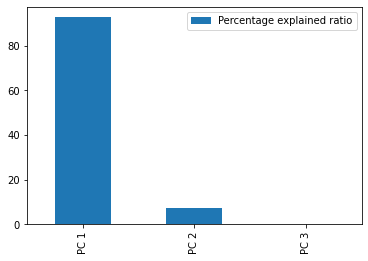

In [8]:
perc = pca.explained_variance_ratio_ * 100

perc = pd.DataFrame(perc, columns=["Percentage explained ratio"], index=["PC %s" % pc for pc in np.arange(len(perc)) + 1])
ax = perc.plot(kind="bar")

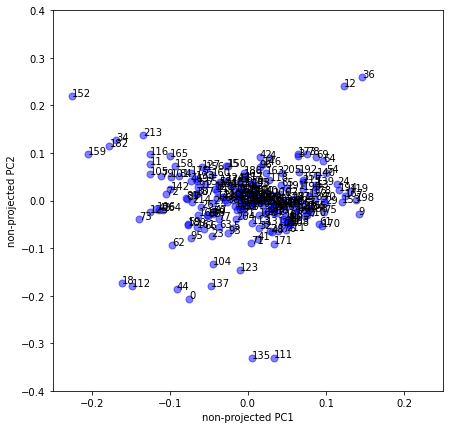

In [11]:
marker = {"linestyle": "none", "marker": "o", "markersize": 7, "color": "blue", "alpha": 0.5}

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(loadings.iloc[:, 0], loadings.iloc[:, 1], label="Loadings", **marker)
ax.set_xlabel("non-projected PC1")
ax.set_ylabel("non-projected PC2")
ax.axis([-1, 1, -1, 1])
text = [
    ax.text(x, y, t) for
    x, y, t in zip(loadings.iloc[:, 0], loadings.iloc[:, 1], RGB.index)]

ax.axis([-0.25, 0.25, -0.4, 0.4]);

plt.savefig('figura12.png')